高通股价--多项式拟合

date:日期<br/>
time:整数时间1，2，3<br/>
close:收盘价

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df=pd.read_excel('data/高通股价.xls')

In [3]:
df.head()

,Date,time,Close
0,1995-01-03,1,23.47
1,1995-01-09,2,20.54
2,1995-01-16,3,22.74
3,1995-01-23,4,27.88
4,1995-01-30,5,27.39


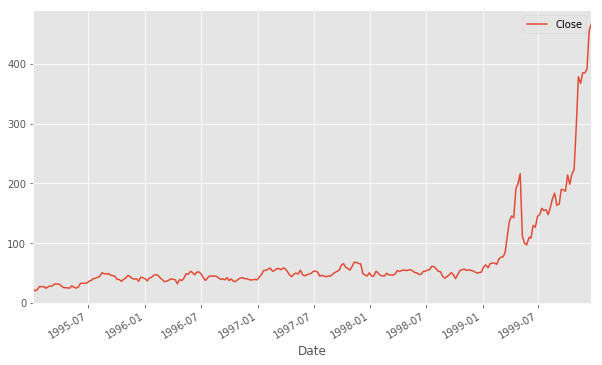

In [4]:
df.plot(x='Date',y='Close',figsize=(10,6))

### 一阶多项式拟合

In [5]:
results = smf.ols('Close ~ 1 +time', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     161.3
Date:                Thu, 11 Jan 2018   Prob (F-statistic):           4.94e-29
Time:                        10:30:01   Log-Likelihood:                -1411.3
No. Observations:                 260   AIC:                             2827.
Df Residuals:                     258   BIC:                             2834.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6941      6.881     -0.682      0.4

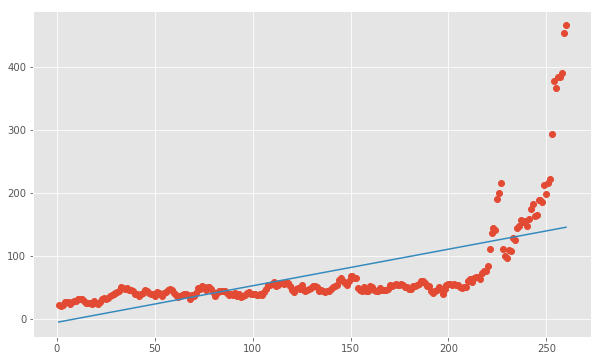

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.time, df.Close, 'o', label="data")
ax.plot(df.time,results.predict(),label="prediction data")
#一次多项式是一条直线

### 二阶多项式拟合

In [7]:

results2 = smf.ols('Close ~ 1 +time+np.power(time,2)', data=df).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     211.3
Date:                Thu, 11 Jan 2018   Prob (F-statistic):           5.45e-55
Time:                        11:00:37   Log-Likelihood:                -1348.0
No. Observations:                 260   AIC:                             2702.
Df Residuals:                     257   BIC:                             2713.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            72.6825      8.14

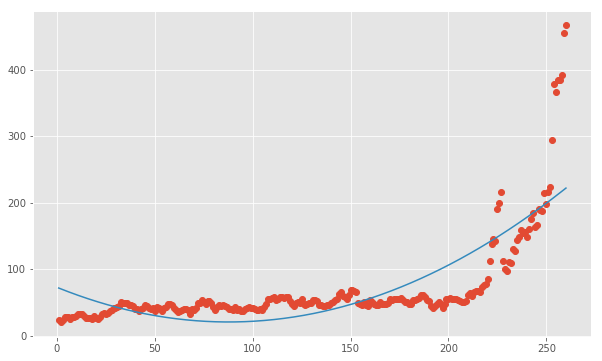

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.time, df.Close, 'o', label="data")
ax.plot(df.time,results2.predict(),label="prediction data")
#二次多项式是一条抛物线

### 三阶多项式

In [10]:
results3 = smf.ols('Close ~ 1 +time+np.power(time,2)+np.power(time,3)', data=df).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     375.2
Date:                Thu, 11 Jan 2018   Prob (F-statistic):           2.22e-93
Time:                        11:03:13   Log-Likelihood:                -1255.3
No. Observations:                 260   AIC:                             2519.
Df Residuals:                     256   BIC:                             2533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -10.8543      7.67

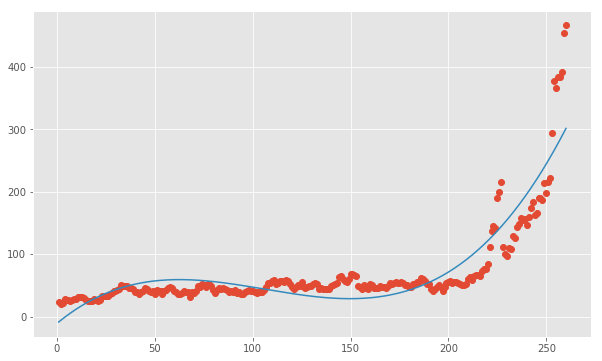

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.time, df.Close, 'o', label="data")
ax.plot(df.time,results3.predict(),label="prediction data")

### 四阶多项式

In [12]:
results4 = smf.ols('Close ~ 1 +time+np.power(time,2)+np.power(time,3)+np.power(time,4)', data=df).fit()
print(results4.summary())
#高阶多项式，容易产生过拟合，预测效果并不好

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     523.1
Date:                Thu, 11 Jan 2018   Prob (F-statistic):          1.39e-121
Time:                        11:04:20   Log-Likelihood:                -1185.9
No. Observations:                 260   AIC:                             2382.
Df Residuals:                     255   BIC:                             2400.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            49.7829      7.42

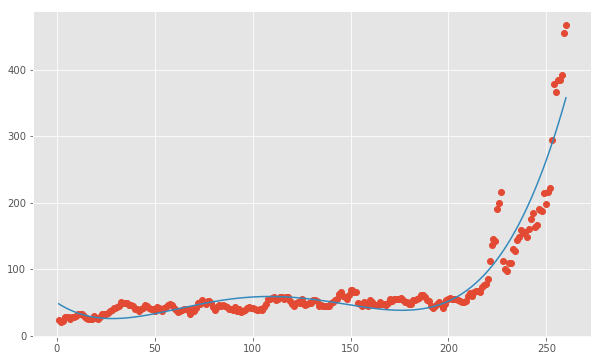

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.time, df.Close, 'o', label="data")
ax.plot(df.time,results4.predict(),label="prediction data")